In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [2]:
#load data
dist_data = pd.read_csv(r'C:\Users\steph\Downloads\AMDARI\DISTRIBUTION ANALYSIS\ev_distribution_dataset.csv')
geo_data = pd.read_csv(r'C:\Users\steph\Downloads\AMDARI\DISTRIBUTION ANALYSIS\geospatial_dataset.csv')
weather_data = pd.read_csv(r'C:\Users\steph\Downloads\AMDARI\DISTRIBUTION ANALYSIS\weather_dataset.csv')

In [3]:
#checking the first few rows in each tables

In [4]:
dist_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [5]:
#observation
#the latitudes and longitudes in  the long EV_Charging_Station_Location column should be split - to be done

In [6]:
geo_data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [7]:
#observation
#the latitudes and longitudes in the Substation_Location column should be split - to be done

In [8]:
weather_data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


In [9]:
#checking for null values

In [10]:
dist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


In [11]:
#observation
#the timestamp column should rather be datetime - to be done

In [12]:
geo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [13]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


In [14]:
#find statistics for each of the datasets

In [15]:
geo_data.describe()

,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [16]:
dist_data.describe()

,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [17]:
weather_data.describe()

,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


In [18]:
#extracting the longitutes and latitudes
charging_station_latitude = 'charging_station_latitude'
charging_station_longitude = 'charging_station_longitude'
substation_latitude = 'substation_latitude'
substation_longitude = 'substation_longitude'

# Extract lat and long for EV charging stations in distribution table
dist_data[charging_station_latitude] = dist_data['EV_Charging_Station_Location'].apply(lambda x: float(x.split(",")[0].replace("(", "").strip()))
dist_data[charging_station_longitude] = dist_data['EV_Charging_Station_Location'].apply(lambda x: float(x.split(",")[1].replace(")", "").strip()))

# Extract lat and long for substation location in geo table
geo_data[substation_latitude] = geo_data['Substation_Location'].apply(lambda x: float(x.split(",")[0].replace("(", "").strip()))
geo_data[substation_longitude] = geo_data['Substation_Location'].apply(lambda x: float(x.split(",")[1].replace(")", "").strip()))

# Drop the original location columns to clean up the dataframe
dist_data = dist_data.drop(columns=['EV_Charging_Station_Location'])
geo_data = geo_data.drop(columns=['Substation_Location'])

In [19]:
#checking if new columns have been added in dist_data and geo_data
geo_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


In [20]:
dist_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,charging_station_latitude,charging_station_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [21]:
#ploting a world map for the locations of the substations along their associated charging stations 

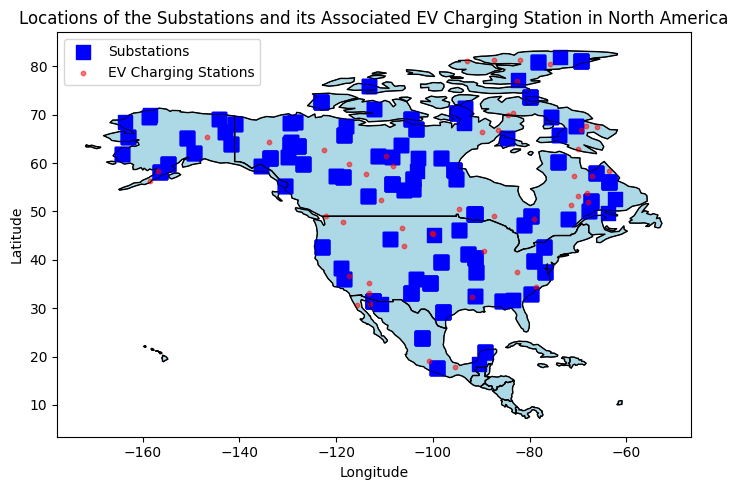

In [22]:
# Load the world map data from the downloaded Natural Earth dataset
world = gpd.read_file(r'C:\Users\steph\Downloads\countries\ne_110m_admin_0_countries.shp')

# Define a list of North American countries
north_american_countries = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
    'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala',
    'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
    'Trinidad and Tobago', 'United States of America'
]

# Filter the map to North America using the 'ADMIN' column
north_america = world[world['ADMIN'].isin(north_american_countries)]

# These should be the actual data you have already defined
dist_data_gdf=gpd.GeoDataFrame(dist_data,geometry=gpd.points_from_xy(dist_data.charging_station_longitude, dist_data.charging_station_latitude))

geo_data_gdf=gpd.GeoDataFrame(geo_data,geometry=gpd.points_from_xy(geo_data.substation_longitude, geo_data.substation_latitude))

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
dist_data_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plotting EV charging stations
geo_data_gdf.plot(ax=ax, markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Set title and axis labels
plt.title('Locations of the Substations and its Associated EV Charging Station in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig('Map of substations and associated charging stations')
plt.show()

#### Insights

The substations (blue squares) and EV charging stations (red dots) are widely distributed across North America, indicating a well-spread network.

There is a noticeable concentration of substations and charging stations in the central and eastern parts of the United States, as well as in southern Canada, which likely corresponds to higher population density and urban areas.

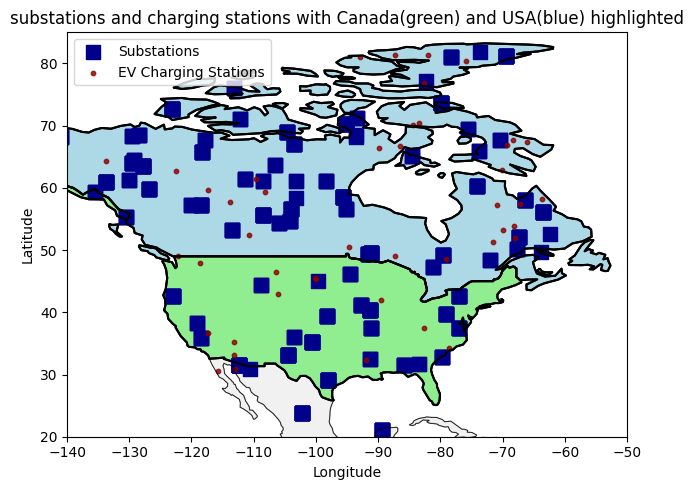

In [23]:
#Show canada and usa representation based on previous insight

# Load the world map data from the downloaded Natural Earth dataset
world = gpd.read_file(r'C:\Users\steph\Downloads\countries\ne_110m_admin_0_countries.shp')

# Define a list of North American countries
north_american_countries = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
    'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala',
    'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
    'Trinidad and Tobago', 'United States of America'
]

# Filter the map to North America using the 'ADMIN' column
north_america = world[world['ADMIN'].isin(north_american_countries)]

# Highlight only Canada and the USA
highlight_countries = ['Canada', 'United States of America']
highlight = world[world['ADMIN'].isin(highlight_countries)]

# Separate the data for Canada and the USA
canada = world[world['ADMIN'] == 'Canada']
usa = world[world['ADMIN'] == 'United States of America']

# These should be the actual data you have already defined
dist_data_gdf = gpd.GeoDataFrame(dist_data, geometry=gpd.points_from_xy(dist_data.charging_station_longitude, dist_data.charging_station_latitude))
geo_data_gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.substation_longitude, geo_data.substation_latitude))

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3)

# Highlight Canada and the USA with different colors
canada.boundary.plot(ax=ax, linewidth=1.5, color='black')
canada.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=1.5)
usa.boundary.plot(ax=ax, linewidth=1.5, color='black')
usa.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=1.5)

# Plotting the substations on the map
dist_data_gdf.plot(ax=ax, marker='s', markersize=100, color='darkblue', label='Substations')

# Plotting EV charging stations
geo_data_gdf.plot(ax=ax, markersize=10, color='darkred', label='EV Charging Stations', alpha=0.8)

# Set xlim and ylim to focus on Canada and the USA
ax.set_xlim([-140, -50])
ax.set_ylim([20, 85])

# Set title and axis labels
plt.title('substations and charging stations with Canada(green) and USA(blue) highlighted')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig('canada and usa representation')
plt.show()


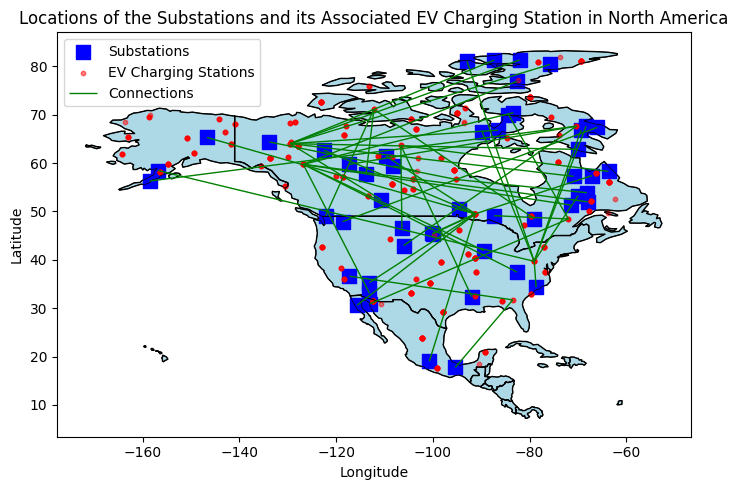

In [24]:
#finding substations and their charging stations connected to them
from shapely.geometry import Point, LineString

# Load the world map data from the downloaded Natural Earth dataset
world = gpd.read_file(r'C:\Users\steph\Downloads\countries\ne_110m_admin_0_countries.shp')

# Define a list of North American countries
north_american_countries = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
    'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala',
    'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
    'Trinidad and Tobago', 'United States of America'
]

# Filter the map to North America using the 'ADMIN' column
north_america = world[world['ADMIN'].isin(north_american_countries)]

# Convert the DataFrame to GeoDataFrames
dist_data_gdf = gpd.GeoDataFrame(dist_data, geometry=gpd.points_from_xy(dist_data.charging_station_longitude, dist_data.charging_station_latitude))
geo_data_gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.substation_longitude, geo_data.substation_latitude))


# Create LineString objects to represent connections between substations and EV charging stations
lines = []
min_length = min(len(dist_data_gdf), len(geo_data_gdf))
for i in range(min_length):
    substation_point = dist_data_gdf.iloc[i].geometry
    dist_station_point = geo_data_gdf.iloc[i].geometry
    line = LineString([substation_point, dist_station_point])
    lines.append(line)

# Convert the list of LineString objects to a GeoDataFrame
lines_geo = gpd.GeoDataFrame(geometry=lines)

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
geo_data_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plotting EV charging stations
dist_data_gdf.plot(ax=ax, markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Plotting the lines connecting substations to EV charging stations
lines_geo.plot(ax=ax, linewidth=1, color='green', label='Connections')

# Set title and axis labels
plt.title('Locations of the Substations and its Associated EV Charging Station in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig('connections')
plt.show()


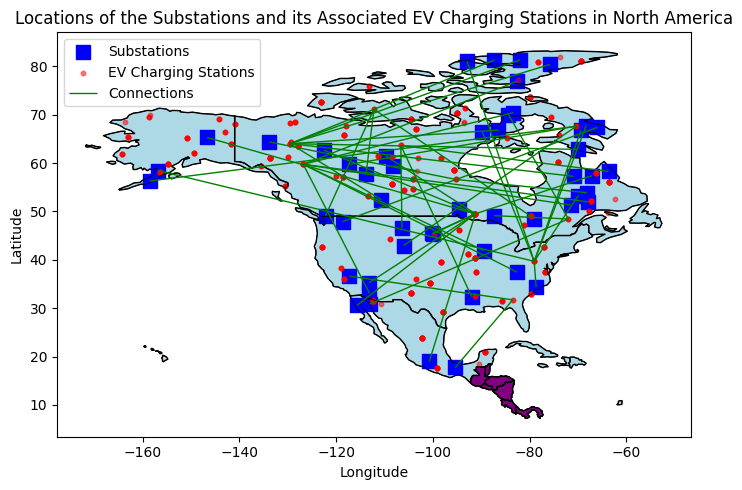

In [25]:


# Load the world map data from the downloaded Natural Earth dataset
world = gpd.read_file(r'C:\Users\steph\Downloads\countries\ne_110m_admin_0_countries.shp')

# Define a list of North American countries
north_american_countries = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
    'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala',
    'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
    'Trinidad and Tobago', 'United States of America'
]

# Central American countries to highlight
central_american_countries = [
    'Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama'
]

# Filter the map to North America using the 'ADMIN' column
north_america = world[world['ADMIN'].isin(north_american_countries)]
central_america = world[world['ADMIN'].isin(central_american_countries)]

# These should be the actual data you have already defined
dist_data_gdf = gpd.GeoDataFrame(dist_data, geometry=gpd.points_from_xy(dist_data.charging_station_longitude, dist_data.charging_station_latitude))
geo_data_gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.substation_longitude, geo_data.substation_latitude))

# Create LineString objects to represent connections between substations and EV charging stations
lines = []
min_length = min(len(dist_data_gdf), len(geo_data_gdf))
for i in range(min_length):
    substation_point = geo_data_gdf.iloc[i].geometry
    ev_station_point = dist_data_gdf.iloc[i].geometry
    line = LineString([substation_point, ev_station_point])
    lines.append(line)

# Convert the list of LineString objects to a GeoDataFrame
lines_geo = gpd.GeoDataFrame(geometry=lines)

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Highlight Central American countries
central_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
central_america.plot(ax=ax, color='purple', edgecolor='black')

# Plotting the substations on the map
geo_data_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plotting EV charging stations
dist_data_gdf.plot(ax=ax, markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Plotting the lines connecting substations to EV charging stations
lines_geo.plot(ax=ax, linewidth=1, color='green', label='Connections')

# Set title and axis labels
plt.title('Locations of the Substations and its Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig('Map of substations and associated charging stations with Central America highlighted')
plt.show()


#### Insights

There are fewer substations and EV charging stations in Central American countries, highlighting potential areas for infrastructure development to support EV adoption.

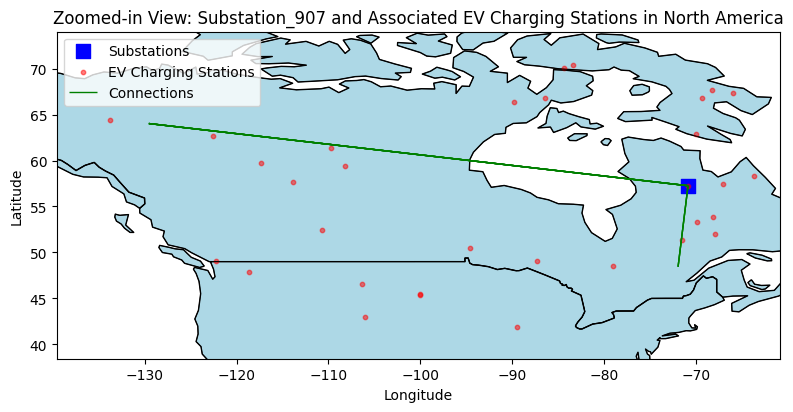

In [26]:
#zooming in to see the connections clearer

selected_substation = geo_data.iloc[0]
associated_ev = dist_data[dist_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to geodataframe
dist_data_gdf = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.charging_station_longitude, associated_ev.charging_station_latitude))
substation_gdf = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), geometry=gpd.points_from_xy(
    [selected_substation.substation_longitude], [selected_substation.substation_latitude]))

lines_selected = [
    (ev_row['charging_station_longitude'], ev_row['charging_station_latitude'], selected_substation['substation_longitude'], selected_substation['substation_latitude'])
    for _, ev_row in associated_ev.iterrows()
]

line_gdf_selected = gpd.GeoDataFrame(
    geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected]
)

# Load the world map data from the downloaded Natural Earth dataset
world = gpd.read_file(r'C:\Users\steph\Downloads\countries\ne_110m_admin_0_countries.shp')

# Define a list of North American countries
north_american_countries = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
    'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala',
    'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
    'Trinidad and Tobago', 'United States of America'
]

# Filter the map to North America using the 'ADMIN' column
north_america = world[world['ADMIN'].isin(north_american_countries)]

# Determine the bounding box for the zooming area
buffer = 10  # degree
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
substation_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')

# Plotting EV charging stations
geo_data_gdf.plot(ax=ax, markersize=10, color='red', label='EV Charging Stations', alpha=0.5)

# Plotting the lines connecting substations to EV charging stations
line_gdf_selected.plot(ax=ax, linewidth=1, color='green', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set title and axis labels
plt.title(f'Zoomed-in View: {selected_substation["Substation_ID"]} and Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.savefig('Substation_907 and Charging stations')
plt.tight_layout()
plt.show()


#### Assumption

1. The charging stations are quiet far from substation.
2. It looks like there are two charging stations to each substation

In [27]:
#checking the distribution of EV types and the count of network stations

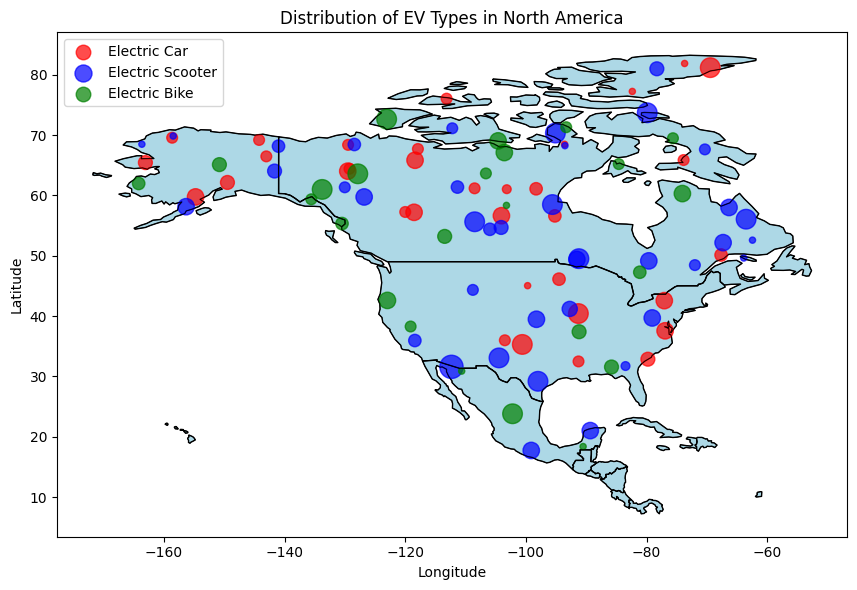

In [30]:
# Group by location and EV type, then count the number of stations
grouped_data = dist_data.groupby(['charging_station_latitude', 'charging_station_longitude', 'EV_Type']).size().reset_index(name='count')

# Convert grouped data to GeoDataFrame
grouped_gdf = gpd.GeoDataFrame(grouped_data,
                               geometry=gpd.points_from_xy(grouped_data.charging_station_longitude, grouped_data.charging_station_latitude))

# Load the world map data from the downloaded Natural Earth dataset
world = gpd.read_file(r'C:\Users\steph\Downloads\countries\ne_110m_admin_0_countries.shp')

# Define a list of North American countries
north_american_countries = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
    'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala',
    'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
    'Trinidad and Tobago', 'United States of America'
]

# Filter the map to North America using the 'ADMIN' column
north_america = world[world['ADMIN'].isin(north_american_countries)]

# Plotting the map
fig, ax = plt.subplots(figsize=(12, 6))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Define the colors for EV types
colors = {'Electric Car': 'red', 'Electric Scooter': 'blue', 'Electric Bike': 'green'}

# Plotting EV types
for ev_type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == ev_type]
    sub_gdf.plot(ax=ax, markersize=sub_gdf['count']*20, color=color, label=ev_type, alpha=0.7)

# Set title and axis labels
plt.title('Distribution of EV Types in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.savefig('EV Types in North America.png')
plt.tight_layout()
plt.show()


#### Insights

Electric Cars (red): These are widely distributed across the region, with significant concentrations in the northern parts of Canada and various locations in the United States.

Electric Scooters (blue): These are more sporadically placed, with noticeable clusters in the central and southern regions of the United States.

Electric Bikes (green): These are spread throughout the continent but show a tendency to cluster in central and eastern parts of the United States.

In [31]:
#what is the current ekectricity demand on the distribution network?

In [32]:
# Calculate current electricity demand on the distribution network
current_load = dist_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()
current_load.columns = ['Substation_ID', 'Current_Load_kWh']
# Display the current load on each substation
print(current_load)

     Substation_ID  Current_Load_kWh
0    Substation_11      10534.827701
1   Substation_133       4579.522617
2   Substation_139       4606.661188
3   Substation_152       4673.147282
4   Substation_208       4077.834676
5   Substation_218       5997.437051
6   Substation_240       4687.373081
7   Substation_258       5378.214378
8   Substation_261       5408.731889
9   Substation_294       4010.395180
10  Substation_301       4738.530994
11  Substation_321       4808.167154
12  Substation_339       4536.778685
13  Substation_349       4901.836555
14  Substation_365       6503.398302
15  Substation_422       4503.491007
16  Substation_443       5673.039047
17  Substation_470       4197.582833
18  Substation_516       4912.512816
19  Substation_523       5741.826256
20   Substation_54       5181.866255
21  Substation_546       4744.516491
22  Substation_560       4538.090862
23  Substation_562       4725.568891
24  Substation_628       5122.009815
25   Substation_64       4526.764018
2

In [33]:
# Merge current load with geospatial data
network_capacity = pd.merge(current_load, geo_data, on='Substation_ID')

print(network_capacity)

     Substation_ID  Current_Load_kWh  Transmission_Line_Capacity (MW)  \
0    Substation_11      10534.827701                               80   
1    Substation_11      10534.827701                               43   
2   Substation_133       4579.522617                               75   
3   Substation_139       4606.661188                               46   
4   Substation_152       4673.147282                               61   
5   Substation_208       4077.834676                               84   
6   Substation_218       5997.437051                               71   
7   Substation_240       4687.373081                               89   
8   Substation_258       5378.214378                               22   
9   Substation_261       5408.731889                               63   
10  Substation_294       4010.395180                               35   
11  Substation_301       4738.530994                               20   
12  Substation_321       4808.167154               

In [34]:
# Calculate remaining capacity for each substation
network_capacity['Remaining_Capacity_kW'] = network_capacity['Transmission_Line_Capacity (MW)'] * 1000 - network_capacity['Current_Load_kWh']
print(network_capacity)

     Substation_ID  Current_Load_kWh  Transmission_Line_Capacity (MW)  \
0    Substation_11      10534.827701                               80   
1    Substation_11      10534.827701                               43   
2   Substation_133       4579.522617                               75   
3   Substation_139       4606.661188                               46   
4   Substation_152       4673.147282                               61   
5   Substation_208       4077.834676                               84   
6   Substation_218       5997.437051                               71   
7   Substation_240       4687.373081                               89   
8   Substation_258       5378.214378                               22   
9   Substation_261       5408.731889                               63   
10  Substation_294       4010.395180                               35   
11  Substation_301       4738.530994                               20   
12  Substation_321       4808.167154               

#### what are the substations with low remaining capacities?

In [35]:
# Define a higher threshold for low remaining capacity (e.g., 20% or 30% of transmission line capacity)
low_capacity_threshold_20 = network_capacity['Transmission_Line_Capacity (MW)'] * 200
low_capacity_threshold_30 = network_capacity['Transmission_Line_Capacity (MW)'] * 300

# Identify substations with low remaining capacity using 20% threshold
potential_bottlenecks_20 = network_capacity[network_capacity['Remaining_Capacity_kW'] <= low_capacity_threshold_20]

# Identify substations with low remaining capacity using 30% threshold
potential_bottlenecks_30 = network_capacity[network_capacity['Remaining_Capacity_kW'] <= low_capacity_threshold_30]

# Display potential bottlenecks using 20% threshold
print("Potential Bottlenecks (20% Threshold):")
print(potential_bottlenecks_20)

# Display potential bottlenecks using 30% threshold
print("Potential Bottlenecks (30% Threshold):")
print(potential_bottlenecks_30)

Potential Bottlenecks (20% Threshold):
Empty DataFrame
Columns: [Substation_ID, Current_Load_kWh, Transmission_Line_Capacity (MW), substation_latitude, substation_longitude, Remaining_Capacity_kW]
Index: []
Potential Bottlenecks (30% Threshold):
Empty DataFrame
Columns: [Substation_ID, Current_Load_kWh, Transmission_Line_Capacity (MW), substation_latitude, substation_longitude, Remaining_Capacity_kW]
Index: []


#### Insights

According to this analysis there are no subsation with low remaining capacities

let's proceed to performing a temporal analysis to confirm the findings from this analysis

#### Temporal Analysis

In [42]:
# Create new columns for hour and day of the week
dist_data['Hour'] = pd.to_datetime(dist_data['Timestamp']).dt.hour
dist_data['DayOfWeek'] = pd.to_datetime(dist_data['Timestamp']).dt.dayofweek

# Group by Substation_ID, Hour, and DayOfWeek, and calculate the mean consumption
temporal_analysis = dist_data.groupby(['Substation_ID', 'Hour', 'DayOfWeek'])['Electricity_Consumption (kWh)'].mean().reset_index()

# Identify peak demand periods
peak_periods = temporal_analysis[temporal_analysis['Electricity_Consumption (kWh)'] > temporal_analysis['Electricity_Consumption (kWh)'].quantile(0.95)]

print(peak_periods)


     Substation_ID  Hour  DayOfWeek  Electricity_Consumption (kWh)
42  Substation_523    23          1                     689.679298
62  Substation_717    11          3                     679.455786
84  Substation_907    18          4                     714.394409
86  Substation_911    18          3                     718.980293
93  Substation_996     2          6                     663.241130


#### Insights

Here are the key findings:

1. Substation_523: Hour: 23 (11 PM) Day of the Week: 1 (Monday) Electricity Consumption: 689.68 kWh
2. Substation_717: Hour: 11 (11 AM) Day of the Week: 3 (Wednesday) Electricity Consumption: 679.46 kWh
3. Substation_907: Hour: 18 (6 PM) Day of the Week: 4 (Thursday) Electricity Consumption: 714.39 kWh
4. Substation_911: Hour: 18 (6 PM) Day of the Week: 3 (Wednesday) Electricity Consumption: 718.98 kWh
5. Substation_996: Hour: 2 (2 AM) Day of the Week: 6 (Saturday) Electricity Consumption: 663.24 kWh

##### Interpretation

These peak periods indicate times when the substations are experiencing significantly higher electricity consumption compared to other times.

1. Late Evening Consumption (Substation_523): High consumption at 11 PM on Monday could be due to residential usage, indicating increased household activities such as heating, cooling, or electric vehicle charging.

2. Mid-Morning Consumption (Substation_717): The peak at 11 AM on Wednesday suggests high mid-morning activities, possibly due to commercial or industrial operations.

4. Evening Peaks (Substation_907 and Substation_911): High consumption at 6 PM on Wednesday and Thursday is likely associated with residential activities and the end of the workday when people return home.

5. Early Morning Consumption (Substation_996): The 2 AM peak on Saturday might be due to industrial operations running overnight or off-peak electric vehicle charging.

In [43]:
#How does the weather affect the electricity usage?

In [44]:
# Convert the 'Timestamp' columns to datetime format if not already done
dist_data['Timestamp'] = pd.to_datetime(dist_data['Timestamp'])
weather_data['Timestamp'] = pd.to_datetime(weather_data['Timestamp'])

# Merge EV data with weather data on the timestamp and substation ID
combined_data = pd.merge(dist_data, weather_data, on=['Timestamp', 'Substation_ID'])

# Display the first few rows of the merged data to verify
print(combined_data.head())

            Timestamp Geographical_Area Customer_Type  \
0 2020-01-10 18:00:00             Urban    Industrial   
1 2020-01-22 17:00:00             Rural   Residential   
2 2020-01-10 18:00:00             Urban    Industrial   
3 2020-01-22 17:00:00             Rural   Residential   
4 2020-01-10 18:00:00             Urban    Industrial   

   Electricity_Consumption (kWh) EV_Charging_Station_Specifications  \
0                     714.394409                             Type 2   
1                     554.336019                             Type 2   
2                     714.394409                             Type 2   
3                     554.336019                             Type 2   
4                     714.394409                             Type 2   

            EV_Type Charging_Habit  Number_of_EVs   Substation_ID  \
0      Electric Car     Occasional              8  Substation_907   
1  Electric Scooter         Weekly              5  Substation_907   
2      Electric Car    

In [45]:
# Select relevant columns for correlation analysis
relevant_columns = ['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']

# Calculate the correlation matrix
correlation_matrix = combined_data[relevant_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                               Electricity_Consumption (kWh)  \
Electricity_Consumption (kWh)                       1.000000   
Temperature (°C)                                    0.131543   
Precipitation (mm)                                  0.085014   

                               Temperature (°C)  Precipitation (mm)  
Electricity_Consumption (kWh)          0.131543            0.085014  
Temperature (°C)                       1.000000           -0.005828  
Precipitation (mm)                    -0.005828            1.000000  


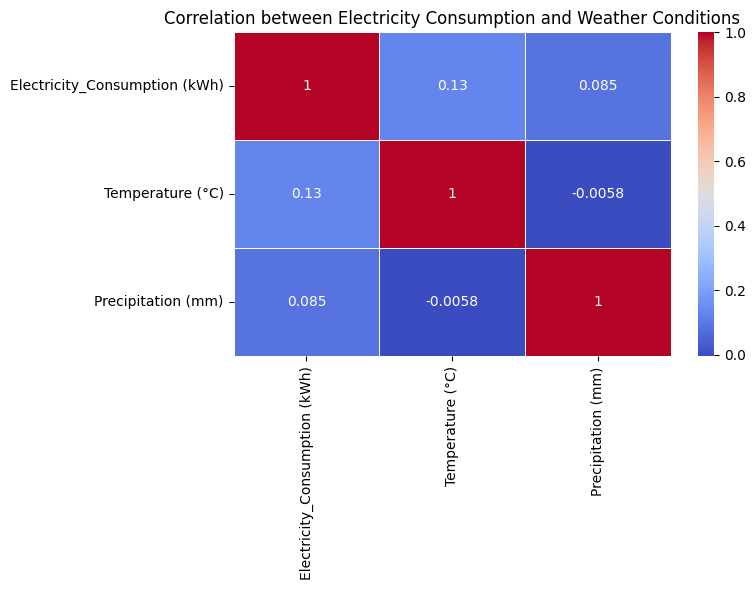

In [48]:
#Merge EV data with weather data on the timestamp
combined_data = pd.merge(dist_data, weather_data, on='Timestamp')

# Correlation between electricity consumption and weather conditions
correlation_matrix = combined_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Electricity Consumption and Weather Conditions')
plt.tight_layout()
plt.savefig('Correlation between Electricity Consumption and Weather Conditions')
plt.show()


#### Insights

1. Electricity Consumption (kWh) vs. Temperature (°C):
Correlation coefficient: 0.131543 0.131543 This indicates a weak positive correlation between electricity consumption and temperature. As the temperature increases, electricity consumption slightly increases.

2. Electricity Consumption (kWh) vs. Precipitation (mm):
Correlation coefficient: 0.085014 0.085014 This indicates a very weak positive correlation between electricity consumption and precipitation. As precipitation increases, electricity consumption slightly increases.

3. Temperature (°C) vs. Precipitation (mm):
Correlation coefficient: − 0.005828 −0.005828 This indicates an almost negligible negative correlation between temperature and precipitation. There is no significant relationship between temperature and precipitation in this dataset.

##### Summary
1. There is a weak positive correlation between electricity consumption and temperature.
2. There is a very weak positive correlation between electricity consumption and precipitation.
3. There is almost no correlation between temperature and precipitation

In [49]:
#performing further exploratory data analysis

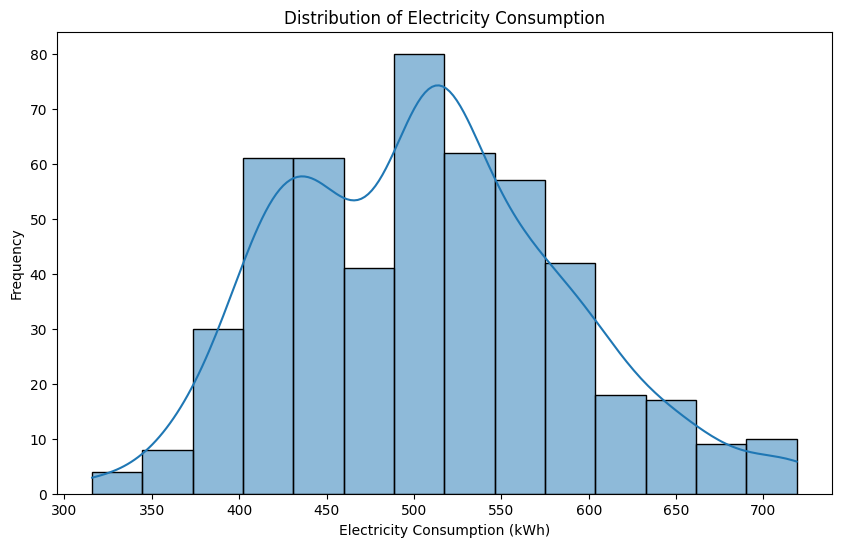

In [51]:
# WHAT IS THE DISTRIBUTION OF ELECTRICITY CONSUMPTION?
plt.figure(figsize=(10, 6))
sns.histplot(dist_data['Electricity_Consumption (kWh)'], kde=True)
plt.title('Distribution of Electricity Consumption')
plt.xlabel('Electricity Consumption (kWh)')
plt.ylabel('Frequency')
plt.savefig('Distribution_of_Electricity_Consumption.png')
plt.show()

#### Insights

The histogram displays the distribution of electricity consumption among different users. The consumption ranges from approximately 300 kWh to 700 kWh. Most users consume between 450 and 600 kWh, with a noticeable peak around 500 kWh. The distribution is slightly skewed to the right, indicating that while most users consume around 500 kWh, there are some users who consume significantly more.


The peak at around 500 kWh suggests that the majority of the users have moderate electricity consumption. The right skewness implies that there are fewer users with very high electricity consumption. Understanding this distribution helps in planning for load management and targeting high consumption users for efficiency programs.

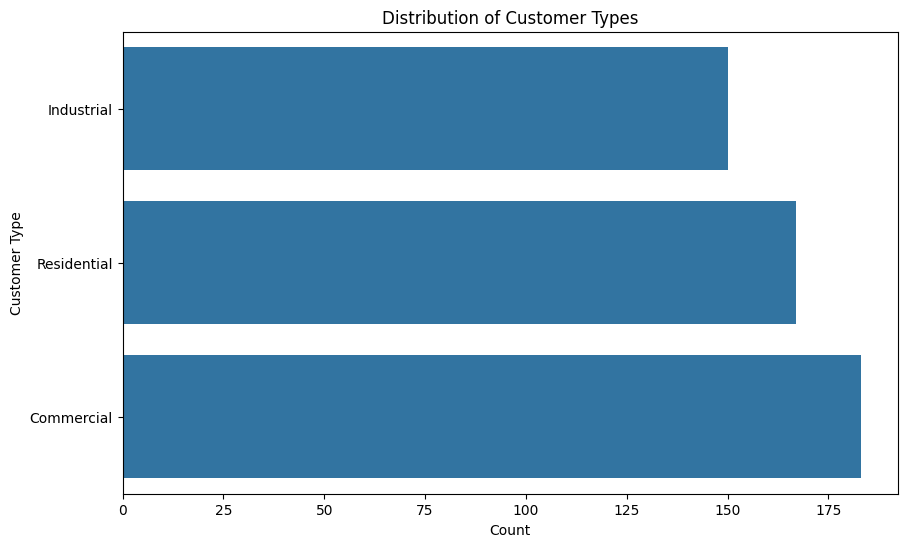

In [53]:
# WHAT IS THE DISTRIBUTION OF CUSTOMER TYPES?
plt.figure(figsize=(10, 6))
sns.countplot(y='Customer_Type', data=dist_data)
plt.title('Distribution of Customer Types')
plt.xlabel('Count')
plt.ylabel('Customer Type')
plt.savefig('Distribution_of_Customer_Types.png')
plt.show()

#### Insights

The count plot shows the distribution of different customer types in the dataset. The customer types include categories such as 'Residential', 'Commercial', and 'Industrial'. The plot reveals that the 'Commercial' customer type has the highest count, followed by 'Industrial' and 'Residential'.


The 'Commercial' sector constitutes the largest portion of the customer base. This indicates that commercial entities are the primary consumers of electricity in this dataset. The 'Industrial' sector also represents a significant portion of the customer base, followed closely by the 'Residential' sector. Understanding the distribution of customer types helps in tailoring specific energy-saving programs for each category.

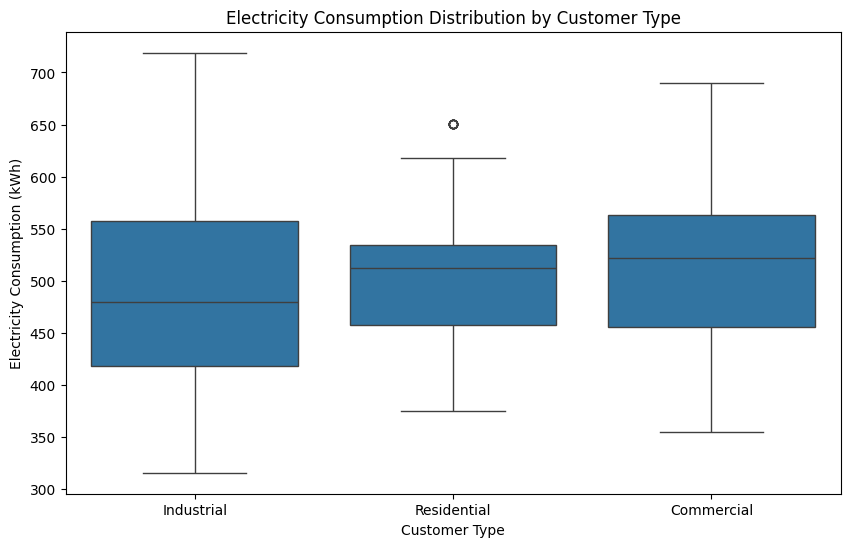

In [56]:
# Box plot to show the distribution of electricity consumption within each customer type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Type', y='Electricity_Consumption (kWh)', data=dist_data)
plt.title('Electricity Consumption Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Electricity Consumption (kWh)')
plt.savefig('Electricity Consumption Distribution by Customer Type')
plt.show()

## Analysis Recommendations Based on Diagrams

### Distribution of Customer Types

Insight: The commercial customer type is the largest, followed by residential and then industrial. This indicates a higher prevalence of commercial customers utilizing the distribution network.

Recommendation: Focus on optimizing services and infrastructure for commercial areas, as they represent the largest customer base and likely have higher energy demands.

### Distribution of Electricity Consumption
Insight: Electricity consumption is fairly normally distributed, with a peak around 500 kWh. This suggests that most customers have a similar level of electricity usage, with fewer outliers on the high and low ends.

Recommendation: Implement standard energy efficiency programs targeting the average consumption range (400-600 kWh) to have the broadest impact.

#### Correlation between Electricity Consumption and Weather Conditions
Insight: There is a weak positive correlation between temperature and electricity consumption, and a very weak correlation between precipitation and electricity consumption.

Recommendation: While weather does affect electricity consumption, the effect is minor. Consideration of weather conditions in demand forecasting could improve accuracy slightly but may not be the primary driver.

##### Distribution of EV Types in North America

Insight: Electric cars are the most common, followed by electric scooters and electric bikes. The distribution of EV types varies across different regions.

Recommendation: Develop targeted marketing and infrastructure plans for regions with higher densities of specific EV types. For instance, areas with more electric scooters might benefit from more frequent but smaller charging stations.


#### Map of Substations and Associated Charging Stations with Central America Highlighted
Insight: Central American countries are highlighted in purple, showing their position relative to North America’s EV infrastructure.

Recommendation: Invest in expanding the EV infrastructure in Central America to bridge the gap with the more developed North American network. This could help foster greater EV adoption in the region.


## General Recommendations

1. Infrastructure Investment: Continue to invest in EV infrastructure, especially in areas with higher EV adoption rates. Ensure that substations are upgraded to handle increased loads from charging stations.

2. Energy Efficiency Programs: Develop programs targeting the average consumption range to maximize impact and encourage energy-saving practices among customers.

3. Data-Driven Planning: Utilize detailed geographic and consumption data to make informed decisions about where to place new infrastructure and how to upgrade existing systems.

4. Regional Customization: Recognize the different needs and conditions of various regions (e.g., temperature variations, types of EVs) and customize solutions accordingly.

5. Load Balancing: Implement smart grid technologies to dynamically balance the load and avoid overburdening any single substation.
